# Exercise 2: Data Cleaning and Integration

We again require several libraries.

In [46]:
# Import the required libraries
import tempfile
import sqlite3
import os
import urllib.request
import scipy.stats
import pandas as pd

Once again, we rely on the AdventureWorks database, but this time we load different data into our `DataFrames`.

In [47]:
# Create a temporary directory
dataset_folder = tempfile.mkdtemp()

# Build path to database
database_path = os.path.join(dataset_folder, "adventure-works.db")

# Get the database
urllib.request.urlretrieve(
    "https://github.com/FAU-CS6/KDD-Databases/raw/main/AdventureWorks/adventure-works.db",
    database_path,
)

# Open connection to the adventure-works.db
connection = sqlite3.connect(database_path)

In [48]:
# Modify the database to contain dirty data
cursor = connection.cursor()
cursor.executescript(
    "UPDATE Person SET LastName = 'Doe';"
    "UPDATE Employee SET HireDate = STRFTIME('%Y-%m-%d %H:%M:%S', HireDate);"
    "UPDATE Employee SET BirthDate = STRFTIME('%Y-%m-%d %H:%M:%S', BirthDate);"
    "UPDATE Employee SET Gender = 'Male' WHERE Gender = 'M' AND NationalIDNumber LIKE \"%8\";"
    "UPDATE Employee SET Gender = 'Female' WHERE Gender = 'F' AND NationalIDNumber LIKE \"%7%\";"
    "UPDATE Employee SET BirthDate = STRFTIME('%Y-%m-%d', BirthDate) WHERE NationalIDNumber LIKE \"%2%\";"
    "UPDATE Employee SET SickLeaveHours = 2306 WHERE BusinessEntityID = 10;"
    "UPDATE Employee SET VacationHours = -12 WHERE BusinessEntityID = 21;"
    "UPDATE Person SET LastName = 'Doe';"
    "UPDATE Employee SET JobTitle = 'None' WHERE NationalIDNumber LIKE \"%1\";"
    "UPDATE Employee SET CurrentFlag = 0 WHERE NationalIDNumber = 658797903 OR NationalIDNumber = 974026903;"
    "UPDATE Employee SET HireDate = STRFTIME('%Y-%m-%d %H:%M:%S', DATE(BirthDate, '-10 year')) "
    'WHERE NationalIDNumber LIKE "2%";'
)

In [49]:
# Create the dirty DataFrame(s)
# Employee DataFrame
dirty_employee_df = pd.read_sql_query(
    "SELECT NationalIDNumber, LoginID, OrganizationNode, JobTitle, BirthDate, MaritalStatus, Gender,"
    "HireDate, SalariedFlag, VacationHours, SickLeaveHours, CurrentFlag, PersonType, NameStyle, Title,"
    "FirstName, MiddleName, LastName, Suffix, EmailPromotion, AdditionalContactInfo, Demographics "
    "FROM Employee "
    "JOIN Person ON Employee.BusinessEntityID = Person.BusinessEntityID",
    connection,
    index_col="NationalIDNumber",
)

Recall that we did not look for dirty data in exercise 1. 

Real world data rarely contains data without some inconsistencies or noise. For this reason, we will now look at the `dirty_employee_df` that contains obvious inconsistencies.

<div class="alert alert-block alert-info">

**Task 1:** 

Use the skills you learned to familiarize yourself with the `dirty_employee_df`. In doing so, try to identify as many problems as possible with the dataset at hand.

</div>

In [50]:
# Use the methods you learned in Part One to familiarize yourself with dirty_employee_df
# (Create new code cells whenever necessary)
dirty_employee_df

,LoginID,OrganizationNode,JobTitle,BirthDate,MaritalStatus,Gender,HireDate,SalariedFlag,VacationHours,SickLeaveHours,...,PersonType,NameStyle,Title,FirstName,MiddleName,LastName,Suffix,EmailPromotion,AdditionalContactInfo,Demographics
NationalIDNumber,,,,,,,,,,,,,,,,,,,,,
295847284,adventure-works\ken0,None,Chief Executive Officer,1969-01-29,S,M,1959-01-29 00:00:00,1,99,69,...,EM,0,None,Ken,J,Doe,None,0,None,"<IndividualSurvey xmlns=""http://schemas.micros..."
245797967,adventure-works\terri0,b'X',Vice President of Engineering,1971-08-01,S,Female,1961-08-01 00:00:00,1,1,20,...,EM,0,None,Terri,Lee,Doe,None,1,None,"<IndividualSurvey xmlns=""http://schemas.micros..."
509647174,adventure-works\roberto0,b'Z\xc0',Engineering Manager,1974-11-12 00:00:00,M,M,2007-11-11 00:00:00,1,2,21,...,EM,0,None,Roberto,None,Doe,None,0,None,"<IndividualSurvey xmlns=""http://schemas.micros..."
112457891,adventure-works\rob0,b'Z\xd6',None,1974-12-23,S,M,2007-12-05 00:00:00,0,48,80,...,EM,0,None,Rob,None,Doe,None,0,None,"<IndividualSurvey xmlns=""http://schemas.micros..."
695256908,adventure-works\gail0,b'Z\xda',Design Engineer,1952-09-27,M,F,2008-01-06 00:00:00,1,5,22,...,EM,0,Ms.,Gail,A,Doe,None,0,None,"<IndividualSurvey xmlns=""http://schemas.micros..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
758596752,adventure-works\lynn0,b'\x95\xab',Sales Representative,1977-02-14,S,Female,2013-05-30 00:00:00,1,36,38,...,SP,0,None,Lynn,N,Doe,None,2,None,"<IndividualSurvey xmlns=""http://schemas.micros..."
982310417,adventure-works\amy0,b'\x95\xe0',European Sales Manager,1957-09-20,M,Female,2012-04-16 00:00:00,1,21,30,...,SP,0,None,Amy,E,Doe,None,1,None,"<IndividualSurvey xmlns=""http://schemas.micros..."
954276278,adventure-works\rachel0,b'\x95\xeb',Sales Representative,1975-07-09,S,Female,2013-05-30 00:00:00,1,35,37,...,SP,0,None,Rachel,B,Doe,None,0,None,"<IndividualSurvey xmlns=""http://schemas.micros..."


In [51]:
dirty_employee_df.shape

(290, 21)

In [52]:
dirty_employee_df.notnull

<bound method DataFrame.notnull of                                    LoginID OrganizationNode  \
NationalIDNumber                                              
295847284             adventure-works\ken0             None   
245797967           adventure-works\terri0             b'X'   
509647174         adventure-works\roberto0         b'Z\xc0'   
112457891             adventure-works\rob0         b'Z\xd6'   
695256908            adventure-works\gail0         b'Z\xda'   
...                                    ...              ...   
758596752            adventure-works\lynn0      b'\x95\xab'   
982310417             adventure-works\amy0      b'\x95\xe0'   
954276278          adventure-works\rachel0      b'\x95\xeb'   
668991357             adventure-works\jae0      b'\x95\xed'   
134219713          adventure-works\ranjit0      b'\x95\xef'   

                                       JobTitle            BirthDate  \
NationalIDNumber                                                       
2

Incomplete data can take many different forms. If you look at the present data set, you will notice `None` values in various attributes. 

In [53]:
# Print the columns containing at least one `None`
dirty_employee_df[
    [
        "OrganizationNode",
        "JobTitle",
        "Title",
        "MiddleName",
        "Suffix",
        "AdditionalContactInfo",
    ]
].head(25)

,OrganizationNode,JobTitle,Title,MiddleName,Suffix,AdditionalContactInfo
NationalIDNumber,,,,,,
295847284,None,Chief Executive Officer,None,J,None,None
245797967,b'X',Vice President of Engineering,None,Lee,None,None
509647174,b'Z\xc0',Engineering Manager,None,None,None,None
112457891,b'Z\xd6',None,None,None,None,None
695256908,b'Z\xda',Design Engineer,Ms.,A,None,None
998320692,b'Z\xde',Design Engineer,Mr.,H,None,None
134969118,b'Z\xe1',Research and Development Manager,None,A,None,None
811994146,b'Z\xe1X',Research and Development Engineer,None,L,None,None
658797903,b'Z\xe1h',Research and Development Engineer,None,N,None,None


Not every `None` equates to missing data. Sometimes it is simply the correct information that the attribute value is "nothing". This can be seen in the six attributes presented. 

<div class="alert alert-block alert-info">

**Task 2:**

For each of the attributes at hand, consider whether the `None` values indicate incomplete information, or if `None` is justified.
</div>

Organization Node, Job Title and Title: None values indicate incomplete info

Noisy data, i.e. small measurement inaccuracies, are difficult to detect in the context of such an exercise. However, it is almost certain that the present data set does not contain any noisy data. 

<div class="alert alert-block alert-info">

**Task 3:**
    
Consider why noisy data is unlikely to be included in `dirty_employee_df`.
</div>


Examples of inconsistencies of this data set can be found in the attributes `Gender`, `BirthDate`, and `HireDate`. 

<div class="alert alert-block alert-info">

**Task 4:**
    
Print the head of the attributes `Gender`, `BirthDate`, and `HireDate`.
</div>

In [54]:
# Print the head of "Gender", "BirthDate", and "HireDate"
dirty_employee_df[['Gender', 'BirthDate', 'HireDate']].head()

,Gender,BirthDate,HireDate
NationalIDNumber,,,
295847284,M,1969-01-29,1959-01-29 00:00:00
245797967,Female,1971-08-01,1961-08-01 00:00:00
509647174,M,1974-11-12 00:00:00,2007-11-11 00:00:00
112457891,M,1974-12-23,2007-12-05 00:00:00
695256908,F,1952-09-27,2008-01-06 00:00:00


<div class="alert alert-block alert-info">

**Task 5:**
    
Consider what inconsistencies are in the `Gender` attribute.
</div>

Women were represented by 'F' and 'Female'

<div class="alert alert-block alert-info">

**Task 6:**
    
Consider what inconsistencies are in the `BirthDate` attribute.</div>

Some of them includes day time some not. Not standart

<div class="alert alert-block alert-info">

**Task 7:**
    
Consider what inconsistencies are in the `HireDate` attribute. (Hint: Consider the attribute in conjunction with the other two attributes)</div>

Hire date can not be earlier than birth date.

Errors in numerical values and in the special outlier are sometimes not quite detectable at a glance. Fortunately, we have already learned methods in Part One that we can now use.

First, let's look at the `SickLeaveHours` attribute. Does it contain outliers or errors?

<div class="alert alert-block alert-info">

**Task 8:**
    
Use a boxplot diagram to graphically analyze whether `SickLeaveHours` contains Outliers.
</div>

<AxesSubplot: >

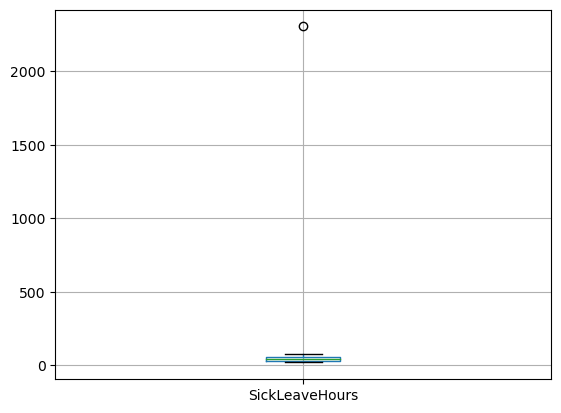

In [55]:
# Draw a boxplot diagram for "SickLeaveHours"
dirty_employee_df.boxplot(column=['SickLeaveHours'])

<div class="alert alert-block alert-info">

**Task 9:**
    
Think about a way to find out which tuple contains the outlier in `SickLeaveHours`.
</div>

In [56]:
# Output the tuple containing the outlier       
dirty_employee_df['SickLeaveHours'].sort_values(ascending=False)

NationalIDNumber
879342154    2306
112457891      80
295847284      69
294148271      69
826454897      69
             ... 
370581729      20
184188301      20
872923042      20
674171828      20
245797967      20
Name: SickLeaveHours, Length: 290, dtype: int64

Additionally, let's take a look at `VacationHours`.

<div class="alert alert-block alert-info">

**Task 10:**
    
Use a boxplot diagram to graphically analyze whether `VacationHours` contains outliers.
</div>

In [57]:
%matplotlib inline


<AxesSubplot: >

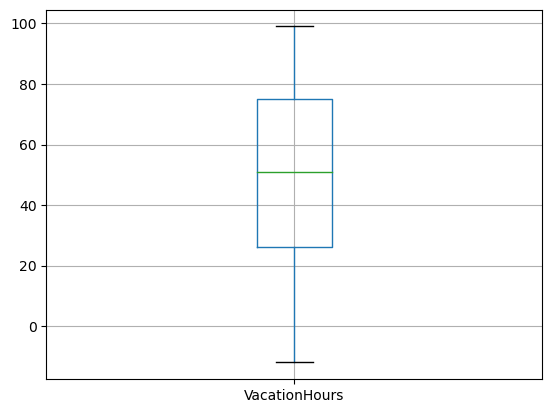

In [58]:
# Draw a boxplot diagram for "VacationHours"
dirty_employee_df.boxplot(column=['VacationHours'])

In [59]:
dirty_employee_df['VacationHours'].describe()

count    290.000000
mean      50.420690
std       29.017634
min      -12.000000
25%       26.000000
50%       51.000000
75%       75.000000
max       99.000000
Name: VacationHours, dtype: float64

<div class="alert alert-block alert-info">

**Task 11:**
    
Even though the boxplot diagram does not show any outliers, it clearly indicates an error in `VacationHours`. Which error?
</div>

Vacation Hours can not be negative

<div class="alert alert-block alert-info">

**Task 12:**
    
Output the affected tuples.
</div>

In [60]:
# Output the tuple(s) containing the error
dirty_employee_df[dirty_employee_df['VacationHours']<0]

,LoginID,OrganizationNode,JobTitle,BirthDate,MaritalStatus,Gender,HireDate,SalariedFlag,VacationHours,SickLeaveHours,...,PersonType,NameStyle,Title,FirstName,MiddleName,LastName,Suffix,EmailPromotion,AdditionalContactInfo,Demographics
NationalIDNumber,,,,,,,,,,,,,,,,,,,,,
243322160,adventure-works\terry0,b'l`',Marketing Specialist,1986-02-04,M,M,1976-02-04 00:00:00,0,-12,42,...,EM,0,None,Terry,J,Doe,None,2,None,"<IndividualSurvey xmlns=""http://schemas.micros..."


There is also an intentional change to the original data in the `dirty_employee_df`. It can be found in either the `MaritalStatus`, `SalariedFlag`, `FirstName`, or `LastName` attribute.

<div class="alert alert-block alert-info">

**Task 13:** 
    
Again, independently use your learned skills to search the attributes `MaritalStatus`, `SalariedFlag`, `FirstName`, and `LastName` for the intentional change.
</div>

In [61]:
# Search for the intentional change
dirty_employee_df[['MaritalStatus', 'SalariedFlag', 'FirstName', 'LastName']]

,MaritalStatus,SalariedFlag,FirstName,LastName
NationalIDNumber,,,,
295847284,S,1,Ken,Doe
245797967,S,1,Terri,Doe
509647174,M,1,Roberto,Doe
112457891,S,0,Rob,Doe
695256908,M,1,Gail,Doe
...,...,...,...,...
758596752,S,1,Lynn,Doe
982310417,M,1,Amy,Doe
954276278,S,1,Rachel,Doe


<div class="alert alert-block alert-info">

**Task 14:**
    
In which of the attributes is the intentional error to be found.
</div>

The attribute with the intentional error: ?
Lastname everything is Doe


<div class="alert alert-block alert-info">

**Task 15:**
    
Why do you think is this error intentional?
</div>

The mere detection of dirty data is, of course, only a first step in the data science process. While it is a best case scenario to correct dirty data step by step once it has been identified, this is often a lengthy and difficult process. 

In our example only inconsistencies in `Gender` and `BirthDate` can be quickly fixed.

<div class="alert alert-block alert-info">

**Task 16:**
    
Replace all occurrences of `Female` with `F` and all occurrences of `Male` with `M` in the `Gender` attribute of the `dirty_employee_df`. (Help: [pandas documentation](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.replace.html))
</div>

In [62]:
dirty_employee_df[dirty_employee_df['Gender']=='Male'].shape

(22, 21)

In [63]:
dirty_employee_df.replace({'Gender':{'Female':'F', 'Male': 'M'}}, inplace=True)

In [64]:
# Replace "Female" and "Male" values in "Gender"
dirty_employee_df[dirty_employee_df['Gender']=='Female']='F'
dirty_employee_df[dirty_employee_df['Gender']=='Male']='M'

In [65]:
dirty_employee_df[dirty_employee_df['Gender']=='Male'].shape

(0, 21)

<div class="alert alert-block alert-info">

**Task 17:**
    
Delete the suffix `00:00:00` in the `BirthDate` attribute. (Help: [pandas documentation](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.replace.html) - Hint: You may want to use a regular expression.)
</div>

In [66]:
# Delete the suffix 00:00:00 in BirthDate
dirty_employee_df['BirthDate']

NationalIDNumber
295847284             1969-01-29
245797967             1971-08-01
509647174    1974-11-12 00:00:00
112457891             1974-12-23
695256908             1952-09-27
                    ...         
758596752             1977-02-14
982310417             1957-09-20
954276278             1975-07-09
668991357    1968-03-17 00:00:00
134219713             1975-09-30
Name: BirthDate, Length: 290, dtype: object

In [67]:
dirty_employee_df.replace({'BirthDate': r"\ 00:00:00"}, {'BirthDate': ""}, regex = True, inplace=True)

In [68]:
dirty_employee_df['BirthDate']=dirty_employee_df['BirthDate'].str.replace(' 00:00:00', '')


In [69]:
dirty_employee_df['BirthDate'].head(20)

NationalIDNumber
295847284    1969-01-29
245797967    1971-08-01
509647174    1974-11-12
112457891    1974-12-23
695256908    1952-09-27
998320692    1959-03-11
134969118    1987-02-24
811994146    1986-06-05
658797903    1979-01-21
879342154    1984-11-30
974026903    1978-01-17
480168528    1959-07-29
486228782    1989-05-28
42487730     1979-06-16
56920285     1961-05-02
24756624     1975-03-19
253022876    1987-05-03
222969461    1978-03-06
52541318     1978-01-29
323403273    1975-03-17
Name: BirthDate, dtype: object

If only individual tuples contain an error/outlier and these cannot be manually fixed, the most efficient approach is often to simply remove these tuples from the dataset. 

For example this would apply to the tuples with `NationalIDNumber` 243322160 and 879342154 in the `dirty_employee_df`.

<div class="alert alert-block alert-info">

**Task 18:**
    
Delete the tuples with `NationalIDNumber` 243322160 and 879342154. (Help: [pandas documentation](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.drop.html))
</div>

In [70]:
dirty_employee_df.columns

Index(['LoginID', 'OrganizationNode', 'JobTitle', 'BirthDate', 'MaritalStatus',
       'Gender', 'HireDate', 'SalariedFlag', 'VacationHours', 'SickLeaveHours',
       'CurrentFlag', 'PersonType', 'NameStyle', 'Title', 'FirstName',
       'MiddleName', 'LastName', 'Suffix', 'EmailPromotion',
       'AdditionalContactInfo', 'Demographics'],
      dtype='object')

In [71]:
dirty_employee_df.index

Index(['295847284', '245797967', '509647174', '112457891', '695256908',
       '998320692', '134969118', '811994146', '658797903', '879342154',
       ...
       '139397894', '399771412', '987554265', '90836195', '481044938',
       '758596752', '982310417', '954276278', '668991357', '134219713'],
      dtype='object', name='NationalIDNumber', length=290)

In [72]:
'243322160' in dirty_employee_df.index

True

In [73]:
'879342154' in dirty_employee_df.index

True

In [74]:
# Delete the tuples with NationalIDNumber 243322160 and 879342154
dirty_employee_df = dirty_employee_df.drop(index='243322160')

In [75]:
dirty_employee_df = dirty_employee_df.drop(index='879342154')

In [76]:
'243322160' in dirty_employee_df.index

False

In [77]:
'879342154' in dirty_employee_df.index

False

Even for attributes that do not contain any information, it usually makes more sense to remove them from the data set. 

In this example this is the case with the attribute `LastName`.

<div class="alert alert-block alert-info">

**Task 19:**
    
Delete the attribute `LastName`. (Help: [pandas documentation](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.drop.html))
</div>

In [78]:
# Delete the attribute LastName
dirty_employee_df = dirty_employee_df.drop('LastName', axis='columns')

In [79]:
dirty_employee_df.columns

Index(['LoginID', 'OrganizationNode', 'JobTitle', 'BirthDate', 'MaritalStatus',
       'Gender', 'HireDate', 'SalariedFlag', 'VacationHours', 'SickLeaveHours',
       'CurrentFlag', 'PersonType', 'NameStyle', 'Title', 'FirstName',
       'MiddleName', 'Suffix', 'EmailPromotion', 'AdditionalContactInfo',
       'Demographics'],
      dtype='object')

In the context of data integration, we mainly looked at correlation in the lecture. Calculation of this depends on the type of data.

One of the two data types we looked at in more detail in the lecture is nominal data. This describes all data that that is used to label variables without providing any quantitative value.

The first combination of nominal attributes we will look at in this section are `Gender` and `CurrentFlag`. We start by displaying the contingency table for these attributes.

<div class="alert alert-block alert-info">

**Task 20:**
    
Use the pandas function `crosstab()` to create a contingency table for the attributes `Gender` and `CurrentFlag`. Show the subtotals one time and once not. (Help: [pandas documentation](https://pandas.pydata.org/docs/reference/api/pandas.crosstab.html))
</div>

In [80]:
dirty_employee_df['CurrentFlag']

NationalIDNumber
295847284    1
245797967    1
509647174    1
112457891    1
695256908    1
            ..
758596752    1
982310417    1
954276278    1
668991357    1
134219713    1
Name: CurrentFlag, Length: 288, dtype: int64

In [81]:
# Display a contingency table without subtotals
pd.crosstab(dirty_employee_df['Gender'], dirty_employee_df['CurrentFlag'], margins=True)

CurrentFlag,0,1,All
Gender,,,
F,1,83,84
M,1,203,204
All,2,286,288


In [92]:
# Display a contingency table with subtotals
observed = pd.crosstab(dirty_employee_df['Gender'], dirty_employee_df['CurrentFlag'])
observed

CurrentFlag,0,1
Gender,,
F,1,83
M,1,203


The disadvantage of this contingency table is, of course, that only the observed quantities are displayed. For the calculation of the correlation, however, the expected quantities are also important. These can be calculated for example with the function `expected_freq()` from SciPy.

<div class="alert alert-block alert-info">

**Task 21:**
    
Use `expected_freq()` to output the expected quantities for the attributes `Gender` and `CurrentFlag`. (Help: [SciPy documentation](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.contingency.expected_freq.html#scipy.stats.contingency.expected_freq))
</div>

In [93]:
# Display the expected quantities
import numpy as np
#observed = np.array([[dirty_employee_df['CurrentFlag'], dirty_employee_df['Gender']]])
scipy.stats.contingency.expected_freq(observed)

array([[  0.58333333,  83.41666667],
       [  1.41666667, 202.58333333]])

One can see that both the expected and observed values are quite close indicating a small correlation. 

However, in the lecture, the Chi-squared test was presented as a method to validate this more accurately.

<div class="alert alert-block alert-info">

**Task 22:**
    
Use the function `chi2_contingency` from SciPy to determine the correlation between `Gender` and `CurrentFlag`. (Help: [SciPy documentation](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.chi2_contingency.html#scipy.stats.chi2_contingency))
</div>

In [94]:
# Compute chi-squared for "Gender" and "CurrentFlag"
scipy.stats.chi2_contingency(observed)

Chi2ContingencyResult(statistic=0.0, pvalue=1.0, dof=1, expected_freq=array([[  0.58333333,  83.41666667],
       [  1.41666667, 202.58333333]]))

<div class="alert alert-block alert-info">

**Task 23:**
    
Find out what the different values in the above output of `chi2_contingency` stand for and describe how to interpret them in this case.
</div>

Chi2 deki statistic ne kadar düsük olursa o kadar bagimsiz demek. 
pvalue nun da normalde 0.05 den kücük olmasi gerekir. Büyük oldugu icin bu sonuctan pek emin degiliz.
dof = degree of freedom

observed value ile expected value yakin oldugu icin birbirinden bagimsiz diye degerlendiriyoruz

Second, let's look at the `Gender` and `SalariedFlag` attributes.

<div class="alert alert-block alert-info">

**Task 24:**
    
Using the methods learned above, calculate Chi-squared for `Gender` and `SalariedFlag`.
</div>

In [95]:
pd.crosstab(dirty_employee_df['Gender'], dirty_employee_df['SalariedFlag'])

SalariedFlag,0,1
Gender,,
F,63,21
M,174,30


In [96]:
# Compute chi-squared for "Gender" and "SalariedFlag"
observed2 = pd.crosstab(dirty_employee_df['Gender'], dirty_employee_df['SalariedFlag'])
scipy.stats.chi2_contingency(observed2)

Chi2ContingencyResult(statistic=3.649173742467948, pvalue=0.05609703457814885, dof=1, expected_freq=array([[ 69.125,  14.875],
       [167.875,  36.125]]))

<div class="alert alert-block alert-info">

**Task 25:**
    
Interpret the chi-squared for `Gender` and `SalariedFlag`.
</div>

Bu ikisinde correlation var diyebiliriz

The other data type we have considered in the context of correlation is the numeric data type. Here, it is suitable to look at the connection between `VacationHours` and `SickLeaveHours`. 

A method of graphical analysis of correlation in numerical data should already be known from Exercise 1: 

<div class="alert alert-block alert-info">

**Task 26:**
    
Draw a scatter plot regarding `VacationHours` and `SickLeaveHours`.
</div>

In [87]:
dirty_employee_df[['VacationHours', 'SickLeaveHours']]

,VacationHours,SickLeaveHours
NationalIDNumber,,
295847284,99,69
245797967,1,20
509647174,2,21
112457891,48,80
695256908,5,22
...,...,...
758596752,36,38
982310417,21,30
954276278,35,37


<AxesSubplot: xlabel='VacationHours', ylabel='SickLeaveHours'>

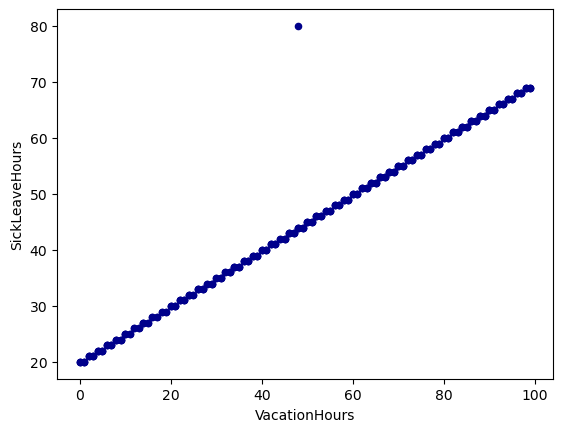

In [88]:
# Draw a scatter plot regarding "VacationHours" and "SickLeaveHours"
dirty_employee_df.plot.scatter(x='VacationHours', y='SickLeaveHours', c='DarkBlue')

However, what was not part of the method in Exercise 1 is the interpretation of this diagram.

<div class="alert alert-block alert-info">

**Task 27:**
    
Interpret the scatter plot regarding `VacationHours` and `SickLeaveHours`.
</div>

They are positively corelated

We can, of course, evaluate this graphical analysis mathematically. In the lecture we used Pearson's product-moment coefficient for this purpose.

<div class="alert alert-block alert-info">

**Task 28:**
    
Compute pearson's product-moment coefficient for `VacationHours` and `SickLeaveHours`. Use SciPy's `pearsonr()` function. (Help: [SciPy documentation](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.pearsonr.html))
</div>

In [98]:
# Compute pearson's product-moment coefficient for "VacationHours" and "SickLeaveHours"
scipy.stats.pearsonr(x=dirty_employee_df['VacationHours'], y=dirty_employee_df['SickLeaveHours'])

PearsonRResult(statistic=0.9890127285205375, pvalue=1.7004450292185053e-239)

<div class="alert alert-block alert-info">

**Task 29:**
    
Find out what the different values in the above output of `pearsonr` stand for and describe how to interpret them in this case.
</div>

Pearson -1 ile +1 arasi deger verir. bizim statistik 1 e yakin oldugu icin corelated.
pvalue umuz da 0 a yakin oldugu icin sonuctan emin sayiliriz. (sonunda -239 var)